<a href="https://colab.research.google.com/github/mdsco2/Minerando-Twitter/blob/main/Minerando_Dados_Twitter_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minerando Redes Sociais - Twitter - ATIVIDADE
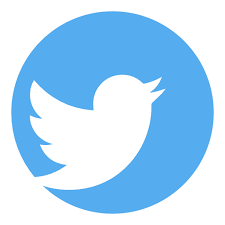

Este notebook tem o objetivo de exercitar os comandos apresentados no notebook  'MinerandoDadosRedesSociais_Twitter_Aula.ipynb'. No último tópico, é proposta uma atividade de análise da atividade de alguns usuários no Twitter.

In [ ]:
# Bibliotecas
import tweepy
from tweepy import OAuthHandler, Stream, StreamListener, Cursor

import datetime
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Autenticação na *API*

In [ ]:
# Credenciais
twitter_keys = {
        'consumer_key' : '',
        'consumer_secret' : '',
        'access_token_key' : '',
        'access_token_secret' : ''
    }

# Setup access to API
auth = OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])

# Parâmentros 
api = tweepy.API(auth, wait_on_rate_limit=False,
                 wait_on_rate_limit_notify=False)
api

Primeiro contato com a API

**Método `get_user`** (informações sobre uma conta)

In [ ]:
bill_gates = api.get_user('BillGates')
bill_gates

User(_api=<tweepy.api.API object at 0x7f67a16afdd0>, _json={'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 'screen_name': 'BillGates', 'location': 'Seattle, WA', 'profile_location': None, 'description': "Sharing things I'm learning through my foundation work and other interests.", 'url': 'https://t.co/uQ5m0NOmVj', 'entities': {'url': {'urls': [{'url': 'https://t.co/uQ5m0NOmVj', 'expanded_url': 'https://gatesnot.es/Pandemic-Prevention', 'display_url': 'gatesnot.es/Pandemic-Preve…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 59378873, 'friends_count': 423, 'listed_count': 122263, 'created_at': 'Wed Jun 24 18:44:10 +0000 2009', 'favourites_count': 268, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 3921, 'lang': None, 'status': {'created_at': 'Sun Jun 05 20:01:21 +0000 2022', 'id': 1533539492396560384, 'id_str': '1533539492396560384', 'text': 'These heroes are doing incredible w

Informações sobre esse objeto na [documentação](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user).

In [ ]:
# nome da conta, login e localização do usuário consultado
print(f'O usuário {bill_gates.name} com login @{bill_gates.screen_name} registrou sua conta em {bill_gates.location}.')
# descrição
print(f'Descrição do perfil: {bill_gates.description}')
# ID
print(f'ID: {bill_gates.id}')

O usuário Bill Gates com login @BillGates registrou sua conta em Seattle, WA.
Descrição do perfil: Sharing things I'm learning through my foundation work and other interests.
ID: 50393960


In [ ]:
# quantidade de perfis seguidos e seguidores
print(f'Atualmente, @{bill_gates.screen_name} segue {bill_gates.friends_count} contas e é seguido por {bill_gates.followers_count} contas.')

Atualmente, @BillGates segue 423 contas e é seguido por 59378873 contas.


In [ ]:
# quantidade de posts favoritados
print(f'@{bill_gates.screen_name} já favoritou {bill_gates.favourites_count} posts.')

@BillGates já favoritou 268 posts.


In [ ]:
# Se a conta de usuário é verificada
print(f'@{bill_gates.screen_name} teve sua conta verificada?')
print(bill_gates.verified)

@BillGates teve sua conta verificada?
True


In [ ]:
# quantidade de tweets postados
print(f'@{bill_gates.screen_name} já postou {bill_gates.statuses_count} tweets.')

@BillGates já postou 3921 tweets.


In [ ]:
# Seleciona 20 perfis seguidos
bill_gates.friends()

[User(_api=<tweepy.api.API object at 0x7f67a16afdd0>, _json={'id': 94573568, 'id_str': '94573568', 'name': 'Reetika Revathy Subramanian', 'screen_name': 'reetiks', 'location': 'Cambridge, England', 'description': 'Journalist, Researcher | PhD scholar @CambridgeGender @Gates_Cambridge | Work on girlhood, climate, early marriage, migration | Run @ClimateBrides @Gomadcrassh', 'url': 'https://t.co/F8FZWzL6Y6', 'entities': {'url': {'urls': [{'url': 'https://t.co/F8FZWzL6Y6', 'expanded_url': 'https://reetika.contently.com', 'display_url': 'reetika.contently.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1682, 'friends_count': 1891, 'listed_count': 33, 'created_at': 'Fri Dec 04 14:56:57 +0000 2009', 'favourites_count': 15846, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 9353, 'lang': None, 'status': {'created_at': 'Sun Jun 05 15:25:27 +0000 2022', 'id': 1533470061964300288, 'id_str': '153347

In [ ]:
# Selecionar 20 seguidores
bill_gates.followers()

[User(_api=<tweepy.api.API object at 0x7f67a16afdd0>, _json={'id': 1533572705760514049, 'id_str': '1533572705760514049', 'name': 'Olamilakan Lekzy', 'screen_name': 'Godsentmommy192', 'location': '', 'description': "Don't shy to text me if you need a financial support,Dm with your cash app or PayPal to get spoiled instantly mommy love you 😍😍😍", 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 1, 'listed_count': 0, 'created_at': 'Sun Jun 05 22:13:41 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1533572797875757058/_rT7RKwr_no

In [ ]:
# Tweets presentes na timeline, ou seja, a atividade do usuário (tweets, retweets)
bill_gates.timeline()

[Status(_api=<tweepy.api.API object at 0x7f67a16afdd0>, _json={'created_at': 'Sun Jun 05 20:01:21 +0000 2022', 'id': 1533539492396560384, 'id_str': '1533539492396560384', 'text': 'These heroes are doing incredible work. https://t.co/lGSCMsI7gE', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/lGSCMsI7gE', 'expanded_url': 'https://gatesnot.es/3NRO2F5', 'display_url': 'gatesnot.es/3NRO2F5', 'indices': [40, 63]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1533539489301135361, 'in_reply_to_status_id_str': '1533539489301135361', 'in_reply_to_user_id': 50393960, 'in_reply_to_user_id_str': '50393960', 'in_reply_to_screen_name': 'BillGates', 'user': {'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 'screen_name': 'BillGates', 'location': 'Seattle, WA', 'description': "Sharing things I'm learning through my foundation work and other interests.", 'ur

In [ ]:
# Quantidade máxima de tweets apresentados em uma chamada
len(bill_gates.timeline())

20

Para a captura de quantidades maiores de dados, o Tweepy oferece um objeto 
**Cursor** ([tutorial](https://docs.tweepy.org/en/stable/pagination.html)) para tratar a complexidade da paginação dos resultados.

In [ ]:
# o valor máximo de resultados entregues em uma chamada ao método "followers" é 200
len(bill_gates.followers(count=200))

200

In [ ]:
# instanciação de um objeto "Cursor" para o acesso ao método específico da API
cursor = tweepy.Cursor(api.followers, screen_name='BillGates')

In [ ]:
# iteração sobre o cursor para o acesso aos itens capturados, respeitando os limites quantitativos estabelecidos para cada método da API
i = 0
for item in cursor.items():
  print(i)
  print(item.name)
  i += 1

0
Olamilakan Lekzy
1
Zoe Martin
2
Gee West
3
Googel ,com
4
Designer Hasan
5
Alwahidy
6
AHMAD SALEH
7
Larm Pharmacy
8
Pixlboy
9
María Angela Trejo Guillen
10
CRISTINA LORENZO
11
drlnl
12
Anon Anon
13
Eminem
14
Lily
15
crasharm
16
Malik Adnan
17
Михаил Евдокимов
18
Hassan Hashim
19
Murat çeperoğlu
20
Pitsi Ya Mebala
21
Aggoune Lounis
22
Hilmiye67Sevme296
23
عبد الحليم
24
Gino Cipriani
25
Andres Sierra
26
TK@お金と家族
27
Cønstantin Grosu
28
Toni
29
Muhammad Shayan Abro
30
ramy_rox
31
Havva24Sevis360
32
Asif Ali
33
Mayra
34
Elif54Sevinik570
35
Angela Gail
36
Ifagat25Sevindik547
37
Fatma33Sevis860
38
jj p
39
Богдан
40
Elif26Seviner130
41
GriGri
42
Louis
43
Mine64Seviptekin503
44
john babalola
45
Georgios Vrekos
46
AitorF
47
Biel Cdm
48
Mohammed Tauqeer
49
Larry Jones
50
Viktor Estenstad
51
Carlos Quintanilla
52
Ifagat73Sevindik591
53
weiwei
54
Mahmood Niazi
55
Mohamed Bentayeb
56
Catherine Escalona
57
Ayush Charoe
58
jangelo
59
Oromia for Oromo
60
Tutur
61
Merve79Sevindi364
62
FerinDedhia
63
ju

RateLimitError: ignored

In [ ]:
# para capturar os tweets da conta, limitada à quantidade de 100
cursor = tweepy.Cursor(api.user_timeline, screen_name='BillGates', tweet_mode='extended')
for item in cursor.items(100):
  print(item.full_text)

These heroes are doing incredible work. https://t.co/lGSCMsI7gE
The innovators at @Ecocem have already reduced CO2 emissions in Europe by over 14 million tons. https://t.co/BbUB0svCOD
The brilliant team behind the @_Oceanbird_ could reduce carbon emissions in the sailing industry by up to 90% using clean wind power technology. https://t.co/TPePKtIwpm
As Head of Operations of @CFS_energy, @RocketJoy is working to harness the same energy source that powers the stars to create clean energy here on Earth. https://t.co/54XrO6DicP
Geochemist @mgrace_andrews of @Vestas is exploring how the mineral olivine can be spread across oceans to remove a trillion tons of carbon dioxide from the atmosphere. https://t.co/iZn4jSef7B
Meet some of the brilliant people behind the breakthroughs that could help the world get to net-zero carbon emissions.
Kim (@DaalenKim) was nominated for her outstanding research and her wider activism for global health. Just look at how much she’s accomplished so far. https:/



**Método `search`**:

Pesquisa os tweets de até 7 dias atrás segundo parâmetros estabelecidos.
Sendo o parâmetro "count" limitado a 100, por default retorna 15.

In [ ]:
# Realizar a seguinte pesquisa
q = 'Bolsonaro OR Lula'
count = 100

from urllib.parse import unquote

results = api.search(q=q, count=count, tweet_mode='extended')
results

[Status(_api=<tweepy.api.API object at 0x7f67a16afdd0>, _json={'created_at': 'Sun Jun 05 22:18:14 +0000 2022', 'id': 1533573942237085696, 'id_str': '1533573942237085696', 'full_text': '@youarecoringa @CentralEleicoes Mesmo que use, o outro vai usar também, e o Lula vai aparecer no palanque dele, isso dificulta para Marília manter o eleitorado petista mais alienado, tomara que consiga.', 'truncated': False, 'display_text_range': [32, 202], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'youarecoringa', 'name': 'bruno', 'id': 2958550972, 'id_str': '2958550972', 'indices': [0, 14]}, {'screen_name': 'CentralEleicoes', 'name': 'Central Eleitoral', 'id': 1404506222892666885, 'id_str': '1404506222892666885', 'indices': [15, 31]}], 'urls': []}, 'metadata': {'iso_language_code': 'pt', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1533573253024862208, 'in_reply_to_status_id_st

## 3. Anatomia de um `tweet`

Cada tweet apresenta os seguintes campos: 
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

* created_at
* id / id_str
* full_text
* source
* truncated
* in_reply_to_status_id / in_reply_to_status_id_str
* in_reply_to_user_id / in_reply_to_user_id_str
* in_reply_to_screen_name
* user [id, name, screen_name, location, url, verified, followers_count, friends_count, listed_count, favourites_count,...]  
* coordinates
* place
* quoted_status_id / quoted_status_id_str
* quote_count
* reply_count
* retweet_count
* retweeted_status
* entities
* extended_entities
* favorited
* retweeted
* possibly_sensitive
* filter_level
* lang

Pegar os tweets filtrados e criar um dataframe com os campos que interessem...

Vamos nos fixar em: **created_at, text, user.name, user.screen_name, user.verified, user.followers_count, retweet_count, favorited, retweeted**

In [ ]:
# Realizar uma pesquisa que recupere 1000 tweets elaborados em português,
# relacionados aos candidatos Bolsonaro e Lula
q = '(Lula OR Bolsonaro) lang:pt'
count = 1000
results = api.search(q = q, count = count, tweet_mode='extended')

In [ ]:
# postar os dados obtidos em um dataframe pandas para posterior análise
list_tweets = []
for item in results:
  tweet = {}
  tweet['created_at'] = item.created_at
  tweet['text']=item.full_text
  tweet['user_name'] = item.user.name
  tweet['user_screen_name'] = item.user.screen_name
  tweet['user_verified'] = item.user.verified
  tweet['user_followers_count'] = item.user.followers_count
  tweet['retweet_count']=item.retweet_count
  tweet['favorited'] = item.favorited
  tweet['retweeted'] = item.retweeted
  tweet['users_mentioned'] = item.entities['user_mentions']
  tweet['hashtags'] = item.entities['hashtags']
  list_tweets.append(tweet)

df_tweets= pd.DataFrame(list_tweets)
df_tweets.head()

,created_at,text,user_name,user_screen_name,user_verified,user_followers_count,retweet_count,favorited,retweeted,users_mentioned,hashtags
0,2022-06-05 22:18:49,RT @BrunaTorlay: O Tarcísio é o candidato viáv...,Felipe,Felipe1982_olv,False,3113,93,False,False,"[{'screen_name': 'BrunaTorlay', 'name': 'Bruna...",[]
1,2022-06-05 22:18:49,"RT @Clauwild1: Sim, claro! “Bolsonaro teve qua...",Carlos,Carlos72261504,False,3149,841,False,False,"[{'screen_name': 'Clauwild1', 'name': 'Claudia...",[]
2,2022-06-05 22:18:49,RT @PedroRonchi2: Entendeu porque não tem impe...,"Gustavo, urso não classificado",gutoappolo,False,5037,39,False,False,"[{'screen_name': 'PedroRonchi2', 'name': 'Pedr...",[]
3,2022-06-05 22:18:49,@AnaPaula_CSC @roxmo Tem idiota q acha q o lul...,LORDKRATOS,ElitonKratos,False,189,0,False,False,"[{'screen_name': 'AnaPaula_CSC', 'name': 'Ana ...",[]
4,2022-06-05 22:18:48,RT @LulaOficial: No dia que celebram-se os 50 ...,Paulo Roberto,PauloBetoC,False,65,214,False,False,"[{'screen_name': 'LulaOficial', 'name': 'Lula'...",[]


## **Com base nos resultados alocados no DataFrame, qual seria o candidato com mais menções dentro dos tweets coletados?**

In [ ]:
bolsonaro = df_tweets[df_tweets['text'].str.lower().str.contains('bolsonaro') == True].shape[0]
lula = df_tweets[df_tweets['text'].str.lower().str.contains('lula') == True].shape[0]

print(f'Quantidade de tweets mencionando "Bolsonaro" {bolsonaro}')
print(f'Quantidade de tweets mencionando "Lula": {lula}')

Quantidade de tweets mencionando "Bolsonaro" 48
Quantidade de tweets mencionando "Lula": 50


Detalhe para a coluna `users mentioned`, utilizada para verificar os usuários mencionados em um tweet. Essa informação é útil quando se analisa popularidade de usuários.

In [ ]:
df_tweets['users_mentioned'][0]

[{'id': 1102708546926465024,
  'id_str': '1102708546926465024',
  'indices': [3, 15],
  'name': 'Bruna Torlay',
  'screen_name': 'BrunaTorlay'}]

In [ ]:
# Ordenando os tweets pelos usuários com mais seguidores (mais influentes?)
df_tweets.sort_values('user_followers_count', ascending = False)

,created_at,text,user_name,user_screen_name,user_verified,user_followers_count,retweet_count,favorited,retweeted,users_mentioned,hashtags
11,2022-06-05 22:18:46,Ciro Nogueira: ‘113% de Lula nas pesquisas sem...,Gazeta Brasil,SigaGazetaBR,False,193084,0,False,False,[],[]
55,2022-06-05 22:18:36,RT @freu_rodrigues: Deputado do PT e tesoureir...,Lia Crespo #ForaCabeçaDeOvo,liacrespo,False,57339,806,False,False,"[{'screen_name': 'freu_rodrigues', 'name': 'Fr...",[]
89,2022-06-05 22:18:26,RT @brasil247: Fernando Holiday admite: se ape...,🚩WILSON LULA 2022 🚩,WilsonO36040576,False,26372,9,False,False,"[{'screen_name': 'brasil247', 'name': 'Brasil ...",[]
84,2022-06-05 22:18:28,RT @DilmaeTaON: Fiz uma limpa no meu twitter e...,🏳️‍🌈Gato Conectado🚩 é resistência!,GatoConectadoPT,False,15830,6,False,False,"[{'screen_name': 'DilmaeTaON', 'name': '🚩 AMãe...","[{'text': 'oPTeiLulaJá', 'indices': [125, 137]}]"
28,2022-06-05 22:18:42,RT @TerraBrasilnot: Ex-assessor de Trump virá ...,𝔏𝔢𝔫𝔦𝔫𝔥𝔞🇧🇷,Lenynha333,False,11611,39,False,False,"[{'screen_name': 'TerraBrasilnot', 'name': 'Te...",[]
...,...,...,...,...,...,...,...,...,...,...,...
58,2022-06-05 22:18:35,"RT @FlavioBolsonaro: Com Bolsonaro, o cartão d...",francisco longo,francis76799430,False,8,86,False,False,"[{'screen_name': 'FlavioBolsonaro', 'name': 'F...","[{'text': 'bolsonaro', 'indices': [117, 127]},..."
94,2022-06-05 22:18:25,RT @CarlaZambelli38: LULA HONESTO?\n\nÇEI... h...,SergiodaRBr,RSergioda,False,2,1064,False,False,"[{'screen_name': 'CarlaZambelli38', 'name': 'C...",[]
48,2022-06-05 22:18:37,@franklin_adson @folha DISCORDO. tem que bloqu...,vô falar viu,taonepunch,False,2,0,False,False,"[{'screen_name': 'franklin_adson', 'name': 'Ad...",[]
60,2022-06-05 22:18:34,RT @randolfeap: 🚨 ATENÇÃO! ALERTA DE GOLPE! 🚨\...,Mateus Nogueira,MateusNogueiraC,False,0,191,False,False,"[{'screen_name': 'randolfeap', 'name': 'Randol...",[]


## 4. Captura de streaming

Para simular o processamento de um streaming de dados, será utilizada a API de streaming do Twitter, que seleciona, randomicamente, uma amostra dos tweets que satisfazem à condição.

Para isso, deve ser criada uma subclasse da classe `StreamListener` do Tweepy e sobrescrever os métodos que sejam necessários para o comportamento desejado.

[Aqui](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/filter-realtime/guides/basic-stream-parameters) podem ser encontrados os variados parâmetros a serem utilizados na filtragem dos tweets de interesse.

## **Preparar um fluxo de streaming que capture 2000 tweets que contenham a palavra `economia`, imprimindo o nome do usuário e o texto do tweet.** 

In [ ]:
TRACKING_KEYWORDS = ['economia']
TWEETS_TO_CAPTURE = 2000

In [ ]:
class TweetListener(StreamListener):
    def __init__(self, api=None):
        super(TweetListener, self).__init__()
        self.num_tweets = TWEETS_TO_CAPTURE
        #self.file = open(OUTPUT_FILE, "w")

    # No método 'on_status' se customiza o que fazer com o dado obtido com o filtro
    # No caso está sendo selecionado alguns campos para serem mostrados, 
    # além da quantidade de tweets filtrados
    def on_status(self, status):
        tweet = status._json
        print(tweet['user']['name'], tweet['text'])
        print(self.num_tweets)
        self.num_tweets += 1
          
    def on_error(self, status):
        print(status)

In [ ]:
l = TweetListener()

In [ ]:
stream = Stream(auth, l)

In [ ]:
streaming = stream.filter(track=TRACKING_KEYWORDS, is_async=False)

403
403
403
403
403


KeyboardInterrupt: ignored

### Explorar Trend Topics

**Trend Topics** são os 50 assuntos mais comentados no momento da consulta. É muito utilizado para verificar quais assuntos estão repercutindo no momento e capturar as reações dos usuários.

O Twitter entrega essa informação por localidade, bastando ao usuário configurar sua preferência.

A API possibilita a obtenção dos Trend Topics de determindas localidades disponibilizadas na consulta por `trends_available`.

São 467 locais que podem ser pesquisados para verificar os trend topics.

In [ ]:
# total de locais disponíveis para consulta dos Trend Topics
places_id = api.trends_available()
len(places_id)

467

Vamos transformar em um DataFrame do Pandas para consumir essa informação de forma mais fácil.

In [ ]:
# Transformar as informações dos locais para um Dataframe
df_places = pd.DataFrame(places_id)
df_places

,name,placeType,url,parentid,country,woeid,countryCode
0,Worldwide,"{'code': 19, 'name': 'Supername'}",http://where.yahooapis.com/v1/place/1,0,,1,None
1,Winnipeg,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/2972,23424775,Canada,2972,CA
2,Ottawa,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/3369,23424775,Canada,3369,CA
3,Quebec,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/3444,23424775,Canada,3444,CA
4,Montreal,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/3534,23424775,Canada,3534,CA
...,...,...,...,...,...,...,...
462,Vietnam,"{'code': 12, 'name': 'Country'}",http://where.yahooapis.com/v1/place/23424984,1,Vietnam,23424984,VN
463,Petaling,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/56013632,23424901,Malaysia,56013632,MY
464,Hulu Langat,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/56013645,23424901,Malaysia,56013645,MY
465,Ahsa,"{'code': 9, 'name': 'Unknown'}",http://where.yahooapis.com/v1/place/56120136,23424938,Saudi Arabia,56120136,SA


In [ ]:
# Listar os locais do Brasil que possuem localização mapeada nos Trend Topics
locais_brasil = df_places[df_places.country=='Brazil']
locais_brasil

,name,placeType,url,parentid,country,woeid,countryCode
78,Brasília,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455819,23424768,Brazil,455819,BR
79,Belém,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455820,23424768,Brazil,455820,BR
80,Belo Horizonte,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455821,23424768,Brazil,455821,BR
81,Curitiba,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455822,23424768,Brazil,455822,BR
82,Porto Alegre,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455823,23424768,Brazil,455823,BR
83,Recife,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455824,23424768,Brazil,455824,BR
84,Rio de Janeiro,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455825,23424768,Brazil,455825,BR
85,Salvador,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455826,23424768,Brazil,455826,BR
86,São Paulo,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455827,23424768,Brazil,455827,BR
87,Campinas,"{'code': 7, 'name': 'Town'}",http://where.yahooapis.com/v1/place/455828,23424768,Brazil,455828,BR


In [ ]:
# Apresentar os trend topics de Brasília
trends_bsb = api.trends_place(455819)
                                
df_bsb_trends = pd.DataFrame(trends_bsb[0]['trends'])
df_bsb_trends

,name,url,promoted_content,query,tweet_volume
0,#VoleiNoSporTV,http://twitter.com/search?q=%23VoleiNoSporTV,None,%23VoleiNoSporTV,23870.0
1,Flamengo,http://twitter.com/search?q=Flamengo,None,Flamengo,182384.0
2,Arão,http://twitter.com/search?q=Ar%C3%A3o,None,Ar%C3%A3o,34133.0
3,Fortaleza,http://twitter.com/search?q=Fortaleza,None,Fortaleza,54753.0
4,Navarro,http://twitter.com/search?q=Navarro,None,Navarro,70112.0
5,Maracanã,http://twitter.com/search?q=Maracan%C3%A3,None,Maracan%C3%A3,28372.0
6,Ademir,http://twitter.com/search?q=Ademir,None,Ademir,NaN
7,Gabigol,http://twitter.com/search?q=Gabigol,None,Gabigol,13858.0
8,Messi,http://twitter.com/search?q=Messi,None,Messi,491498.0
9,Pablo,http://twitter.com/search?q=Pablo,None,Pablo,104346.0


In [ ]:
# Apresentar os trend topics de Manaus
trends_manaus = api.trends_place(455833	)
                                
df_manaus_trends = pd.DataFrame(trends_bsb[0]['trends'])
df_manaus_trends

,name,url,promoted_content,query,tweet_volume
0,#VoleiNoSporTV,http://twitter.com/search?q=%23VoleiNoSporTV,None,%23VoleiNoSporTV,23870.0
1,Flamengo,http://twitter.com/search?q=Flamengo,None,Flamengo,182384.0
2,Arão,http://twitter.com/search?q=Ar%C3%A3o,None,Ar%C3%A3o,34133.0
3,Fortaleza,http://twitter.com/search?q=Fortaleza,None,Fortaleza,54753.0
4,Navarro,http://twitter.com/search?q=Navarro,None,Navarro,70112.0
5,Maracanã,http://twitter.com/search?q=Maracan%C3%A3,None,Maracan%C3%A3,28372.0
6,Ademir,http://twitter.com/search?q=Ademir,None,Ademir,NaN
7,Gabigol,http://twitter.com/search?q=Gabigol,None,Gabigol,13858.0
8,Messi,http://twitter.com/search?q=Messi,None,Messi,491498.0
9,Pablo,http://twitter.com/search?q=Pablo,None,Pablo,104346.0


A título de curiosidade, pode-se verificar a diferença entre os dois conjuntos de modo a obter os assuntos que esão em "alta" em uma região, mas não na outra.

In [ ]:
# Assuntos que constam em Manaus, mas não em Brasília
set(df_manaus_trends['name'].values).difference(set(df_bsb_trends['name'].values))

set()

In [ ]:
# Assuntos que constam em Brasília, mas não em Manaus
set(df_bsb_trends['name'].values).difference(set(df_manaus_trends['name'].values))

set()

Com o auxílio do GoogleMaps, coletar um ponto na região do Distrito Federal, coletando a Latitude e Longitude. Em seguida, submeter ao método `trends_closest`. Qual a região que aparece?

In [ ]:
api.trends_closest(-15.835020964539375, -47.912921722587186)

[{'country': 'Brazil',
  'countryCode': 'BR',
  'name': 'Goiânia',
  'parentid': 23424768,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/455831',
  'woeid': 455831}]

## Análise da atividade de Deputados Federais no Twitter

O objetivo da atividade é obter uma métrica para analisar quais seriam os Deputados Federais com maior popularidade e influência no Twitter, baseados na abordagem utilizada nesse [artigo](https://towardsdatascience.com/twitter-data-mining-measuring-users-influence-ef76c9badfc0).

As métricas utilizadas serão definidas como **popularidade** e ***alcançabilidade***:
* **popularidade** = *quantidade_retweets* + *quantidade_likes_recebidos*
* **alcançabilidade** = *quantidade_seguidores* - *quantidade_perfis_seguidos*

Para a obtenção dos perfis do Twitter dos deputados federais, pode ser realizada uma extração automatizada da página 'https://auditoriacidada.org.br/contato-dos-deputados-federais-2020-twitter/' .

Com os perfis obtidos, pode-se efetuar consultas à API do Twitter para obter as informações necessárias para a construção das métricas indicadas.

Para o cálculo da **popularidade**, por motivos de limitações no número de consultas estabelecido pelo Twitter, serão considerados somente os 75 tweets mais recentes de cada um dos parlamentares analisados.

In [ ]:
# captura da informação dos perfis
from requests import get
from bs4 import BeautifulSoup

pagina = 'https://auditoriacidada.org.br/contato-dos-deputados-federais-2020-twitter/'

page = get(pagina)
linhas = BeautifulSoup(page.text, 'html.parser').find_all('tr')

perfis_deputados_twitter = []
for linha in linhas:
    children = linha.findChildren("td")
    perfis_deputados_twitter.append(children[2].text)
    
#removendo o primeiro elemento da lista, pois é o título da coluna
perfis_deputados_twitter = perfis_deputados_twitter[1:]
perfis_deputados_twitter = set([perfil[1:] for perfil in perfis_deputados_twitter])
perfis_deputados_twitter.remove('')
perfis_deputados_twitter

{'10ronaldomartin',
 '23rubensbueno',
 'AbilioSantana_',
 'AcacioFavacho',
 'AdolfoViana_',
 'AecioNeves',
 'AfonsoFlorence',
 'Alan_Rick',
 'Alceu_Moreira',
 'AleSerfiotis',
 'AlencarBraga13',
 'AlexManente23',
 'AlexisFonteyne',
 'Alice_Portugal',
 'AlineSleutjes',
 'Altineu',
 'AluisioMendesMA',
 'AlvinoMarcio',
 'AndreJanonesAdv',
 'ArnaldoJardim',
 'ArthurLira_',
 'AureoRibeiroRJ',
 'Baleia_Rossi',
 'BetoFaroPT',
 'BetoRosado',
 'BiaCavassa',
 'Biakicis',
 'BiradoPindare',
 'Bivar1717',
 'BocaAbertaOf',
 'BohnGass',
 'BolsonaroSP',
 'BoscoCosta_SE',
 'BrazaoChiquinho',
 'CacaLeao',
 'CamiloPSB',
 'CarlaZambelli38',
 'CarlosZarattini',
 'Carlos_Gaguim',
 'CarolDeToni',
 'Cassio_4011',
 'CelioMouraTO',
 'CelioStudart',
 'Charles_Federal',
 'ChristianeYared',
 'CleberVerde10',
 'CoronelTadeu',
 'Czmadureira',
 'DEPPASTOREURICO',
 'DFDanielFreitas',
 'DF_PauloFreire',
 'DanielCoelho23',
 'DanielPMERJ',
 'Daniel_PCdoB',
 'DanielaWaguinho',
 'DelegadoFreitas',
 'DelegadoFurtado',
 'Dele

Com a lista dos perfis, passa-se a capturar as informações sobre cada conta:


In [ ]:
def obter_informacoes_por_perfil_twitter(id):
  try:
    perfil = api.get_user(id)
  except:
    return id, 0, 0, 0, False, 0, 0
  if perfil.protected:
    return id, 0, 0, 0, False, 0, 0
  screen_name = perfil.screen_name
  number_friends = perfil.friends_count
  number_followers = perfil.followers_count
  number_tweets = perfil.statuses_count
  verified_user = perfil.verified
  try:
    public_tweets = perfil.timeline(count=75, tweet_mode='extended')
  except:
    return screen_name, number_friends, number_tweets, verified_user, 0, 0
  number_rt = 0
  number_likes = 0
  for tweet in public_tweets:
    try:
      if tweet.retweeted_status:
        next
    except:
      number_rt += tweet.retweet_count
      number_likes += tweet.favorite_count
  return screen_name, number_friends, number_followers, number_tweets, verified_user, number_rt, number_likes

Agora é com você... Implemente o restante do código que leia a lista de perfis e gere um dataframe a partir da lista de tuplas que é retornada pelo método `obter_informacoes_por_perfil_twitter`. Com o dataframe obtido, gerar as métricas descritas como **popularidade** e **alcancabilidade**.

In [ ]:
# Gerando a estrutura que guardará as informações dos deputados em um DataFrame
info_deputados = list()

for perfil in perfis_deputados_twitter:
  info_deputados.append(obter_informacoes_por_perfil_twitter(perfil))

colunas = ['screen_name', 'number_friends', 'number_followers', 'number_tweets', 'verified_user', 'number_rt', 'number_likes']
df_deputados = pd.DataFrame(info_deputados, columns=colunas)

df_deputados.head()

,screen_name,number_friends,number_followers,number_tweets,verified_user,number_rt,number_likes
0,mauro_bfilho,74,9658,735,False,4678,22253
1,aroldomartins,88,2973,3097,False,27,363
2,uczai,5218,26843,17043,True,1879,15516
3,DepValmir,1029,10603,9662,True,157,662
4,tiago_dimas,166,2649,946,True,173,424


Quais os 5 deputados com maior popularidade no Twitter, segundo a métrica?

In [ ]:
#popularity_score = quantidade_retweets + quantidade_likes_recebidos

df_deputados['popularity_score'] = df_deputados['number_rt'] + df_deputados['number_likes']
df_deputados.sort_values(by=['popularity_score'], ascending = False).head()

,screen_name,number_friends,number_followers,number_tweets,verified_user,number_rt,number_likes,popularity_score
316,filipebarrost,948,685762,5649,True,80204,424613,504817
325,danielPMERJ,451,140101,16659,True,70885,391938,462823
22,ArthurLira_,163,292291,746,True,31570,285366,316936
170,lpbragancabr,344,700544,2609,True,33976,253349,287325
89,marcofeliciano,34,789276,55972,True,32822,244118,276940


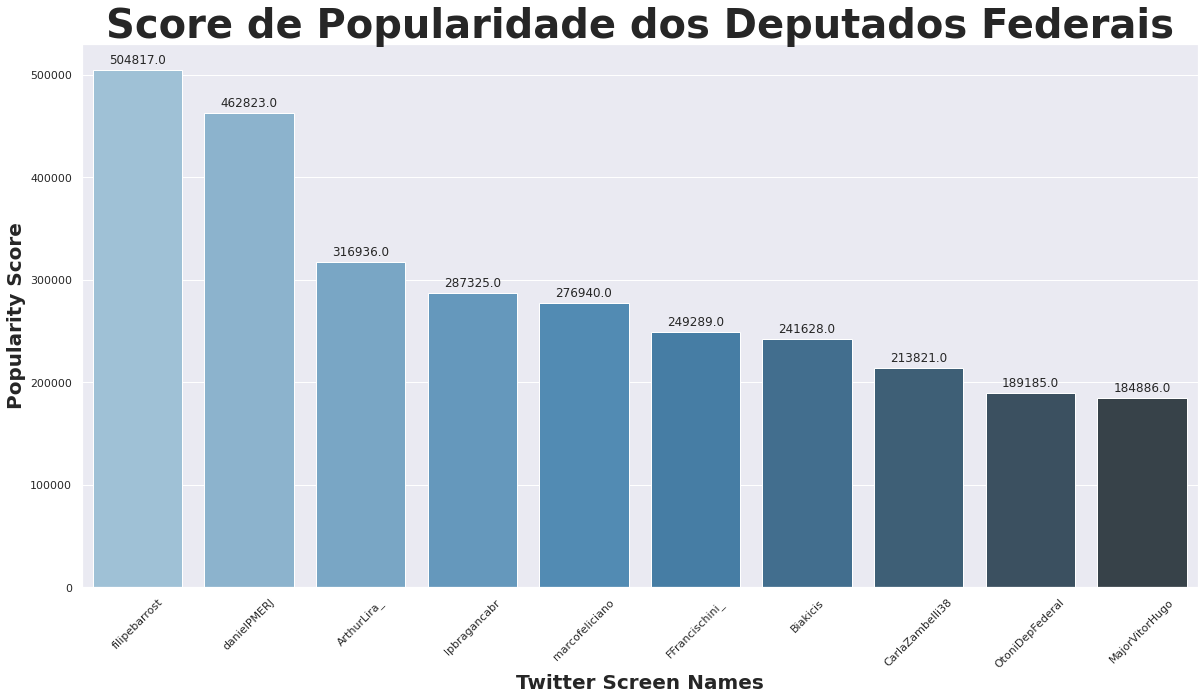

In [ ]:
#bar plot - popularity score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style='darkgrid') #customizing the style of the plot

#visualizing the data using bar plot
ax2 = sns.barplot(x='screen_name', y='popularity_score', palette="Blues_d",
                data=df_deputados.sort_values(by='popularity_score', ascending=False)[0:5]
                )

#getting the values of the data
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y axis labels of the plot
ax2.set_title("Score de Popularidade dos Deputados Federais", size=40, weight='bold')
ax2.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax2.set_ylabel("Popularity Score", size=20, weight='bold')

#changing the rotation of the x axis tick labels
for item in ax2.get_xticklabels():
    item.set_rotation(45)
    
plt.show()

Quais os 5 deputados com maior poder de alcance com seus posts no Twitter, de acordo com a métrica?

In [ ]:
#reach_score = quantidade_seguidores - quantidade_perfis_seguidos

df_deputados['reach_score'] = df_deputados['number_followers'] - df_deputados['number_friends']
df_deputados.sort_values(by=['reach_score'], ascending = False).head()

,screen_name,number_friends,number_followers,number_tweets,verified_user,number_rt,number_likes,popularity_score,reach_score
344,CarlaZambelli38,386,1819869,29208,True,32574,181247,213821,1819483
205,MarceloFreixo,2491,1812132,52477,True,9848,99748,109596,1809641
135,Biakicis,1202,1362772,30139,True,34109,207519,241628,1361570
248,RodrigoMaia,672,983314,4510,True,3157,46428,49585,982642
346,gleisi,858,910347,18318,True,24067,133856,157923,909489


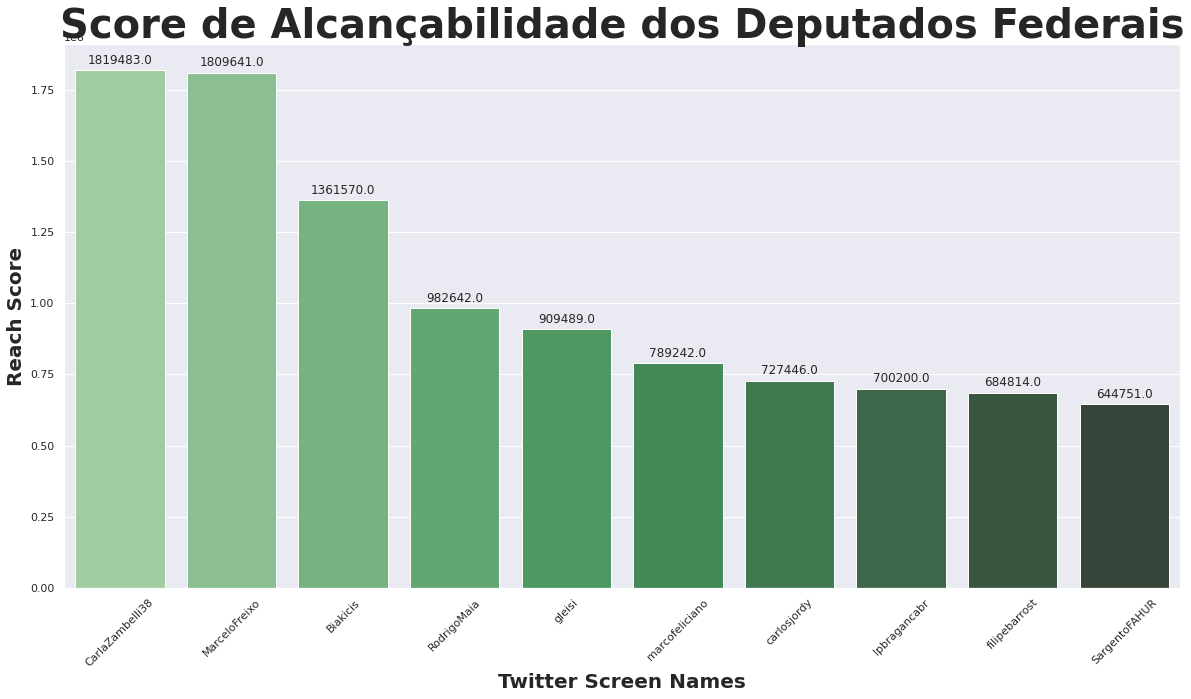

In [ ]:
#bar plot - reach score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax = sns.barplot(x='screen_name', y='reach_score', palette="Greens_d",
                data=df_deputados.sort_values(by='reach_score', ascending=False)[0:5]
                )

#getting the values of the data
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y labels of the plot
ax.set_title("Score de Alcançabilidade dos Deputados Federais", size=40, weight='bold')
ax.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax.set_ylabel("Reach Score", size=20, weight='bold')

#changing the rotation of the x axis tick labels 
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
plt.show()